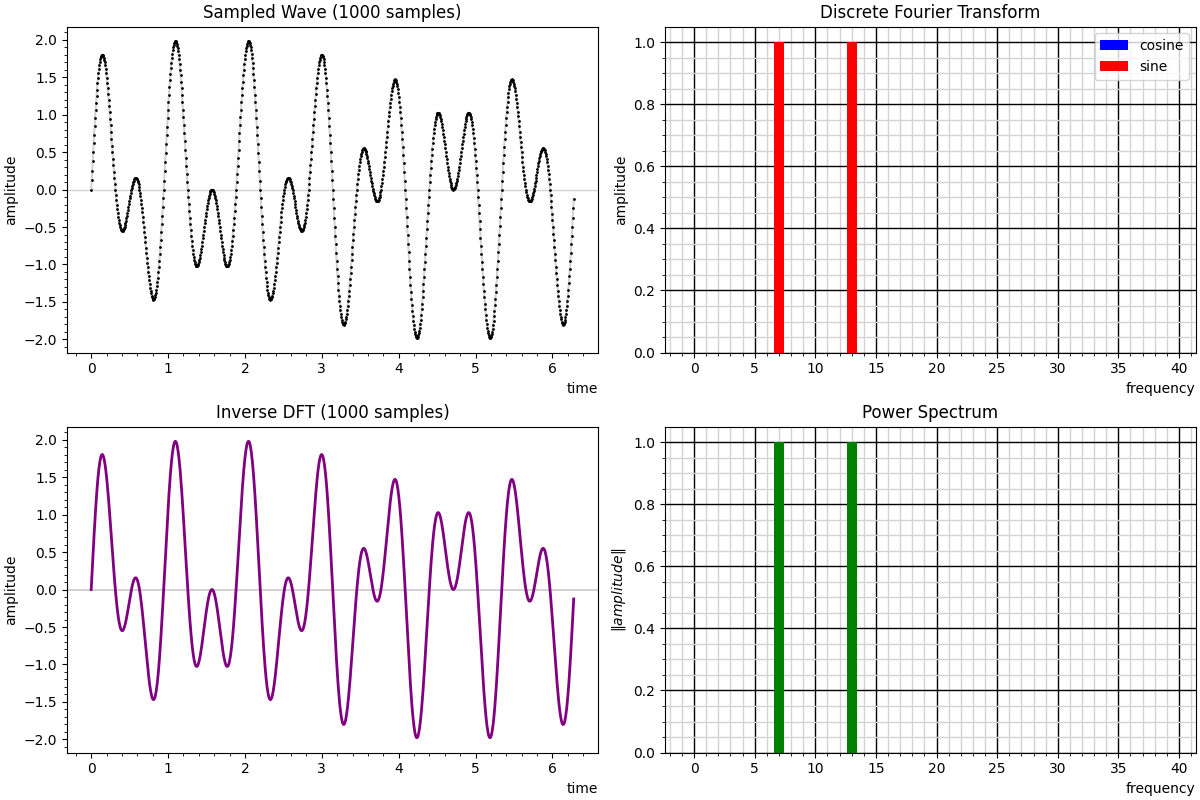

In [4]:
"""unknown_wave.ipynb"""
# Cell 1
# Used Dave and Ashely's Code

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator

if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget

max_freq: int = 40

# fmt: off

def dft(ts: NDArray[np.float_],
        ys: NDArray[np.float_]
    )-> tuple[NDArray[np.float_], NDArray[np.float_]]:
    # Calculate the DFT of the waveform
    # Determine the number of samples and the Nyquist limit, which is half the number of samples
    num_samples: int = ts.size
    num_terms: int = int(num_samples / 2)  # Nyquist limit

    # Initialize arrays with zeros to store the cosine and sine components of the Fourier transform coefficients
    # The 'num_terms' represents the number of terms in the Fourier series
    a_cos: NDArray[np.float_] = np.zeros(num_terms)
    b_sin: NDArray[np.float_] = np.zeros(num_terms)

    # Compute the Fourier transform coefficients using a nested loop
    # Iterate over each term in the Fourier series and each sample in the waveform
    for term in range(0, num_terms):
        a: float = 0.0
        b: float = 0.0
        for sample in range(0, num_samples):
            #Accumulate the cosine and sine terms by multiplying with the appropriate values
            a += 2 * np.cos(term * ts[sample]) * ys[sample]
            b += 2 * np.sin(term * ts[sample]) * ys[sample]
        # Store the final values of the coefficients in the arrays after normalization
        # Round the values to 8 decimal places and add 0 to ensure the datatype is maintained as float
        a_cos[term] = round(a / num_samples, 8) + 0
        b_sin[term] = round(b / num_samples, 8) + 0

    # Normalize the DC component of the Fourier transform coefficients
    # Divide a_cos[0] and b_sin[0] by 2 to ensure corrent scaling of the DC component in the Fourier domaain
    a_cos[0] /= 2
    b_sin[0] /= 2

    return a_cos, b_sin


def idft(a_cos: NDArray[np.float_], b_sin: NDArray[np.float_],
         ts: NDArray[np.float_]) -> NDArray[np.float_]:
    # Compute the Inverse IDFT
    num_terms: int = a_cos.size
    num_points: int = ts.size
    yr: NDArray[np.float_] = np.zeros(num_points)

    # Iterrate over the time points in ts and compute the corresponding amplitude at each point
    # The amplitude is computed by summing up the contributions of each frequency component
    # The contributions are computed using the given 'a_cos' (cosine coefficients) and 'b_sin' (sine coefficients) arrays
    for point in range(0, num_points):
        for term in range(0, num_terms):
            yr[point] += a_cos[term] * np.cos(term * ts[point]) + b_sin[term] * np.sin(
                term * ts[point]
            )

    return yr


def power_spec(a_cos: NDArray[np.float_],
               b_sin: NDArray[np.float_]) -> NDArray[np.float_]:
    # Calcualte the Power Spectrum
    num_terms: int = a_cos.size
    ps: NDArray[np.float_] = np.zeros(num_terms, dtype=np.float_)
    # Iterate over the terms (frequency components) in a_cos and b_sin arrays
    # For each term, compute the magnitude using the formula sqrt(a_cos[term] ** 2 + b_sin[term] ** 2)
    # Store the computed magnitude in the ps array,which represents the power spectrum
    for term in range(0, num_terms):
        ps[term] = np.sqrt(a_cos[term] ** 2 + b_sin[term] ** 2)
    return ps

# fmt: on


def plot_samples(ts: NDArray[np.float_], ys: NDArray[np.float_], ax: Axes) -> None:
    # Plot the Sampled Wave
    ax.set_title(f"Sampled Wave ({ts.size} samples)")

    ax.set_xlabel("time", loc="right")
    ax.set_ylabel("amplitude")

    ax.axhline(y=0.0, color="lightgray", linewidth=1)

    # fmt: off
    ax.plot(ts, ys, color="lightgray",
            marker="o", markerfacecolor="none",
            markersize=1, markeredgecolor="black")
    # fmt: on

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def plot_dft(a_cos: NDArray[np.float_], b_sin: NDArray[np.float_], ax: Axes) -> None:
    # Plot the DFT
    ax.set_title("Discrete Fourier Transform")

    ax.set_xlabel("frequency", loc="right")
    ax.set_ylabel("amplitude")

    # Determine the upper limit of the frequency range to be plotted
    # If max_freq is provided, it is used as the highest frequency
    # Otherwise, calculated it as the maximum value among the indices where a_cos and b_sin arrays are nonzero, plus 1
    highest_freq: int
    if max_freq:
        highest_freq = max_freq
    else:
        highest_freq = (
            max(int(np.amax(np.nonzero(a_cos))), int(np.amax(np.nonzero(b_sin)))) + 1
        )

    # fmt: off
    # Plot the cosine and sine components of the Fourier transform coefficients
    # Only plot the frequencies up the highest frequency determined
    ax.bar(range(0, highest_freq), a_cos[:highest_freq],
           label="cosine", color="blue", zorder=2)
    
    ax.bar(range(0, highest_freq), b_sin[:highest_freq],
           label="sine", color="red", zorder=2)

    # fmt: on

    ax.legend(loc="best")

    # Configure grid lines for major and minor ticks
    ax.grid(which="major", axis="x", color="black", linewidth=1)
    ax.grid(which="minor", axis="x", color="lightgray", linewidth=1)
    ax.grid(which="major", axis="y", color="black", linewidth=1)
    ax.grid(which="minor", axis="y", color="lightgray", linewidth=1)

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def plot_idft(ts: NDArray[np.float_], yr: NDArray[np.float_], ax: Axes) -> None:
    # Plot the IDFT
    ax.set_title(f"Inverse DFT ({ts.size} samples)")

    ax.set_xlabel("time", loc="right")
    ax.set_ylabel("amplitude")

    ax.axhline(y=0.0, color="lightgray")
    # PLot the reconstructed waveform in the time domain
    ax.plot(ts, yr, color="purple", linewidth=2)

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def plot_powerspec(ps: NDArray[np.float_], ax: Axes) -> None:
    # Plot the Power Spectrum
    ax.set_title("Power Spectrum")

    ax.set_xlabel("frequency", loc="right")
    ax.set_ylabel(r"$\Vert amplitude \Vert$")

    # Determine the upper limit of the frequency range to be plotted
    # If max_freq is provided, it is used as the highest frequency
    # Otherwise, calculate is as maximum value among the indices where ps array is nonzero, plus 1
    highest_freq: int
    if max_freq:
        highest_freq = max_freq
    else:
        highest_freq = int(np.amax(np.nonzero(ps))) + 1

    # Plot the power spectrum
    ax.bar(range(0, highest_freq), ps[:highest_freq], color="green", zorder=2)

    # Configure grid lines for major and minor ticks
    ax.grid(which="major", axis="x", color="black", linewidth=1)
    ax.grid(which="minor", axis="x", color="lightgray", linewidth=1)
    ax.grid(which="major", axis="y", color="black", linewidth=1)
    ax.grid(which="minor", axis="y", color="lightgray", linewidth=1)

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def analyze(file_name: str) -> None:
    # Analyze and read the waveform from the given file
    samples: NDArray[np.float_] = np.genfromtxt(file_name, delimiter=",")
    # Extract the time values and amplitude values from the data
    ts: NDArray[np.float_] = samples[:, 0]
    ys: NDArray[np.float_] = samples[:, 1]

    # Compute the DFT to obtain frequency components
    a_cos: NDArray[np.float_]
    b_sin: NDArray[np.float_]
    a_cos, b_sin = dft(ts, ys)

    # Compute the IDFT to reconstruct the waveform
    yr: NDArray[np.float_] = idft(a_cos, b_sin, ts)

    # Calculate the power spectrum of the waveform
    ps: NDArray[np.float_] = power_spec(a_cos, b_sin)

    # Close any existing plots and create a new figure
    plt.close("all")
    plt.figure(file_name, figsize=(12,8), constrained_layout=True)

    # Plot the waveform and its various representations
    plot_samples(ts, ys, plt.subplot(221)) # Plot the sampled waves
    plot_dft(a_cos, b_sin, plt.subplot(222)) # Plot the DFT
    plot_idft(ts, yr, plt.subplot(223)) # Plot the IDFT
    plot_powerspec(ps, plt.subplot(224)) # Plot the power spectrum
    
    # Display the plots
    plt.show()
    
analyze("unknown_wave.csv")